In [8]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [9]:
import yfinance as yf
import pandas as pd

# 1. Define your selected tickers
selected = ['AAPL', 'F', 'WMT', 'GOOG', 'TSLA']

# 2. Fetch the data
# Note: auto_adjust=True is the default now. 
# This means 'Close' IS the adjusted price.
data = yf.download(selected, start='2020-01-01', end='2025-12-31')

# 3. Reorganize the data
# Use 'Close' (no underscore, no 'Adj'). 
# In the new version of yfinance, this column is already split/dividend adjusted.
table = data['Close']

# Display the first few rows
print(table.head())

[*********************100%***********************]  5 of 5 completed

Ticker           AAPL         F       GOOG       TSLA        WMT
Date                                                            
2020-01-02  72.468262  7.027915  67.859535  28.684000  36.433838
2020-01-03  71.763718  6.871242  67.526543  29.534000  36.112190
2020-01-06  72.335571  6.833940  69.191551  30.102667  36.038685
2020-01-07  71.995369  6.901085  69.148376  31.270666  35.704792
2020-01-08  73.153473  6.901085  69.693291  32.809334  35.582253


In [10]:
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 100000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

df.head(20)


,Returns,Volatility,AAPL weight,F weight,WMT weight,GOOG weight,TSLA weight
0,0.292563,0.277229,0.186144,0.362606,0.054546,0.150717,0.245987
1,0.337829,0.280945,0.274034,0.104216,0.291784,0.179981,0.149984
2,0.285098,0.285227,0.016798,0.398791,0.373129,0.092694,0.118588
3,0.262600,0.216058,0.062930,0.071509,0.381646,0.025208,0.458707
4,0.324014,0.286037,0.295482,0.161426,0.349966,0.137928,0.055198
5,0.250819,0.238291,0.293635,0.257939,0.159750,0.022687,0.265988
6,0.311322,0.274210,0.268697,0.155325,0.381487,0.107398,0.087092
7,0.249923,0.287727,0.172363,0.443737,0.336464,0.006790,0.040647
8,0.298305,0.285549,0.554276,0.118876,0.240518,0.071114,0.015215
9,0.263626,0.242787,0.234106,0.281261,0.117457,0.066970,0.300206


In [11]:


# 2. Find the Maximum Sharpe Ratio Portfolio 
# (Assuming a Risk-Free Rate of 0 for simplicity)
df['Sharpe Ratio'] = df['Returns'] / df['Volatility']
max_sharpe = df.iloc[df['Sharpe Ratio'].idxmax()]
print("\n--- Maximum Sharpe Ratio Portfolio ---")
print(max_sharpe)

min_vol = df.iloc[df["Volatility"].idxmin()]
print("\n--- Minimum volatility portfolio ---")
print(min_vol)




--- Maximum Sharpe Ratio Portfolio ---
Returns         0.338012
Volatility      0.253381
AAPL weight     0.018275
F weight        0.011336
WMT weight      0.260166
GOOG weight     0.215192
TSLA weight     0.495032
Sharpe Ratio    1.334007
Name: 68974, dtype: float64

--- Minimum volatility portfolio ---
Returns         0.235048
Volatility      0.203760
AAPL weight     0.062956
F weight        0.087716
WMT weight      0.189139
GOOG weight     0.005422
TSLA weight     0.654766
Sharpe Ratio    1.153553
Name: 7199, dtype: float64


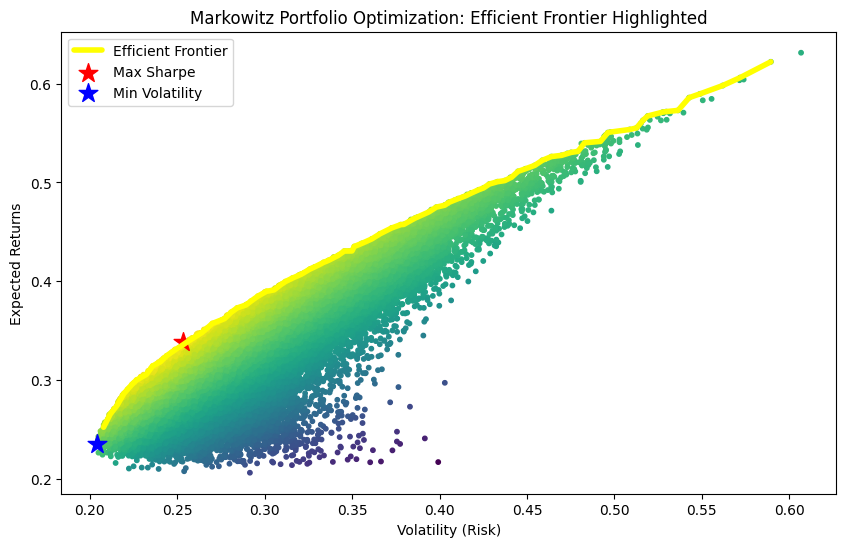

In [12]:
# plot the efficient frontier with a scatter plot
# 1. Trace the outer edge (Frontier)
# We divide the volatility range into 100 bins and find the max return in each
bins = np.linspace(df['Volatility'].min(), df['Volatility'].max(), 100)
frontier_vol = []
frontier_ret = []

for i in range(len(bins)-1):
    mask = (df['Volatility'] >= bins[i]) & (df['Volatility'] < bins[i+1])
    if any(mask):
        max_ret = df[mask]['Returns'].max()
        frontier_ret.append(max_ret)
        # Match the volatility for that specific max return
        frontier_vol.append(df[mask]['Volatility'][df[mask]['Returns'] == max_ret].iloc[0])

# 2. Filter for only the "Efficient" part
# The Efficient Frontier technically starts from the Minimum Volatility portfolio and goes UP
min_vol_val = df['Volatility'].min()
efficient_vol = []
efficient_ret = []
current_max_ret = -100

for v, r in zip(frontier_vol, frontier_ret):
    if v >= min_vol_val and r > current_max_ret:
        efficient_vol.append(v)
        efficient_ret.append(r)
        current_max_ret = r

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Volatility'], df['Returns'], c=df['Sharpe Ratio'], cmap='viridis', s=10)

# Highlight the Frontier in Yellow
plt.plot(efficient_vol, efficient_ret, color='yellow', linewidth=4, label='Efficient Frontier', solid_capstyle='round')

plt.scatter(max_sharpe['Volatility'], max_sharpe['Returns'], color='red', marker='*', s=200, label='Max Sharpe')
plt.scatter(min_vol['Volatility'], min_vol['Returns'], color='blue', marker='*', s=200, label='Min Volatility')

plt.title('Markowitz Portfolio Optimization: Efficient Frontier Highlighted')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()

In [13]:
import yfinance as yf
import pandas as pd
import warnings

# Suppress warnings for a cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

tickers = ['NVDA', 'AMD']
data = yf.download(tickers, start='2020-01-01', end='2025-12-31', progress=False)['Close']

# Calculate metrics
returns = data.pct_change().dropna()
daily_cov = returns.cov().loc['NVDA', 'AMD']
annual_cov = daily_cov * 252
correlation = returns.corr().loc['NVDA', 'AMD']

# Professional Console Output
print("-" * 40)
print(f"{'STOCK RELATIONSHIP ANALYSIS':^40}")
print("-" * 40)
print(f"Tickers:           {', '.join(tickers)}")
print(f"Timeframe:         2020 - 2025")
print("-" * 40)
print(f"Daily Covariance:  {daily_cov:.6f}")
print(f"Annual Covariance: {annual_cov:.4f}")
print(f"Correlation:       {correlation:.4f}")
print("-" * 40)

----------------------------------------
      STOCK RELATIONSHIP ANALYSIS       
----------------------------------------
Tickers:           NVDA, AMD
Timeframe:         2020 - 2025
----------------------------------------
Daily Covariance:  0.000816
Annual Covariance: 0.2057
Correlation:       0.7173
----------------------------------------
